# Plotting the measurements of the dataset
2024-12-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [32]:
dataAF = pd.read_csv(Path("output/af_structures.csv"))
dataSolved = pd.read_csv(Path("output/solved_structures.csv"))
predictionAF = pd.read_excel(Path("../ressources/ISS AF_DMI_structures/AF_prediction_randomized_DMI_results.xlsx"))

predictionAF["model_id"] = predictionAF["model_id"] + ".pdb"

_dataAF = pd.merge(
    left=dataAF, 
    right=predictionAF,
    how='left',
    left_on=['structure_name', 'file'],
    right_on=['prediction_name', 'model_id'],
)
_dataAF = _dataAF.replace({np.nan: "Unkown"})
_dataAF = _dataAF.replace({"known minimal": "Positive"})
_dataAF = _dataAF.replace({"random minimal": "Negative"})
dataAF = _dataAF[[*dataAF.columns, "num_mutation_in_motif"]]
print("Unique values in num_mutation_in_motif:", set(dataAF["num_mutation_in_motif"]))

Unique values in num_mutation_in_motif: {'Positive', 'Negative', 'Unkown'}


In [33]:
dataAF

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,num_mutation_in_motif
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0,Positive
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0,Positive
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3,Positive
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0,Positive
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9,Positive
...,...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29,Positive
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29,Positive
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30,Positive
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528674,30,Positive


In [34]:
dataSolved

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,1ATP_min_DMI,1ATP_min_DMI.pdb,1,0,872.216,6.273099,77
1,1AXC_min_DMI,1AXC_min_DMI.pdb,4,0,1276.554,4.173686,62
2,1B72_min_DMI,1B72_min_DMI.pdb,1,0,585.041,5.182325,36
3,1B8Q_min_DMI,1B8Q_min_DMI.pdb,4,0,928.705,4.376202,42
4,1BXX_min_DMI,1BXX_min_DMI.pdb,6,0,818.831,4.435122,19
...,...,...,...,...,...,...,...
133,5MLW_min_DMI,5MLW_min_DMI.pdb,2,0,1024.182,4.282367,114
134,5VZU_min_DMI,5VZU_min_DMI.pdb,4,0,877.551,4.959148,33
135,6FUZ_min_DMI,6FUZ_min_DMI.pdb,10,3,1123.307,5.531992,2
136,6G84_min_DMI,6G84_min_DMI.pdb,4,0,1254.304,5.521322,35


In [35]:
predictionAF

,prediction_name,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,num_mutation_in_motif,label
0,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_0.pdb,0.887117,96.107999,77.495999,91.454999,0.162263,3.311542,15,5,23,208,known minimal,1
1,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_1.pdb,0.871984,95.793846,73.986000,89.736111,0.145001,3.395909,13,5,20,190,known minimal,1
2,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_2.pdb,0.760784,95.547501,57.906001,86.585239,0.116743,6.166772,16,5,27,237,known minimal,1
3,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_3.pdb,0.413662,94.646667,21.510000,76.362500,0.036380,16.713730,9,3,11,83,known minimal,1
4,DEG_APCC_KENBOX_2_4GGD,312,5,ranked_4.pdb,0.359078,94.830001,19.753333,72.307001,0.029969,18.696838,7,3,9,108,known minimal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,TRG_PTS1_2C0L_NAKL.NAKD,305,4,ranked_0.pdb,0.877999,96.388571,74.585001,92.900000,0.234389,2.903771,21,4,31,271,1,0
2696,TRG_PTS1_2C0L_NAKL.NAKD,305,4,ranked_1.pdb,0.868754,96.614545,75.270000,93.330769,0.233830,3.026700,22,4,31,262,1,0
2697,TRG_PTS1_2C0L_NAKL.NAKD,305,4,ranked_2.pdb,0.852158,96.452917,75.197498,93.416428,0.223745,3.121255,24,4,35,272,1,0
2698,TRG_PTS1_2C0L_NAKL.NAKD,305,4,ranked_3.pdb,0.819368,95.764286,69.147499,91.505600,0.204897,4.233161,21,4,31,258,1,0


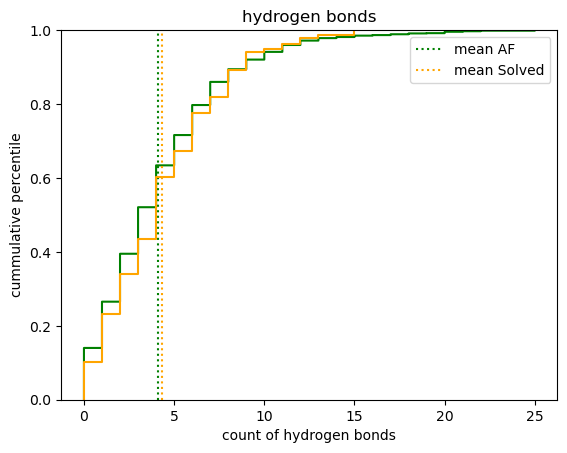

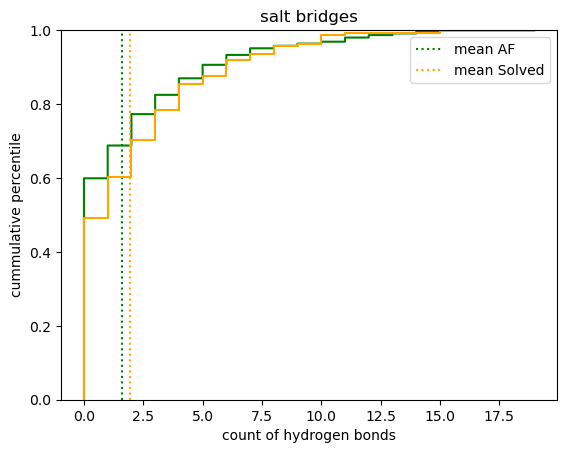

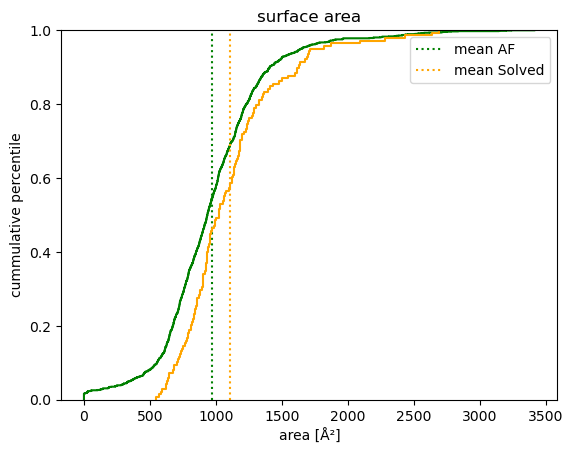

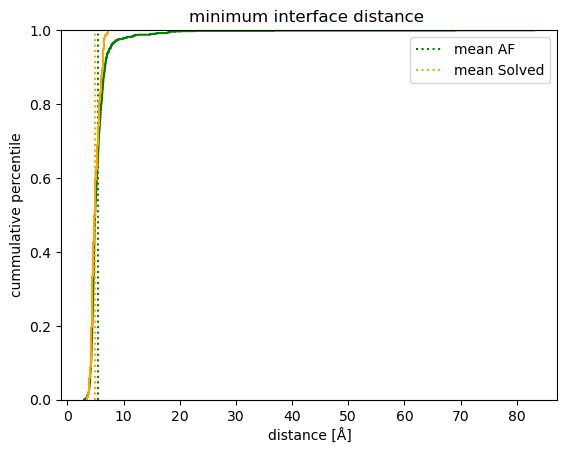

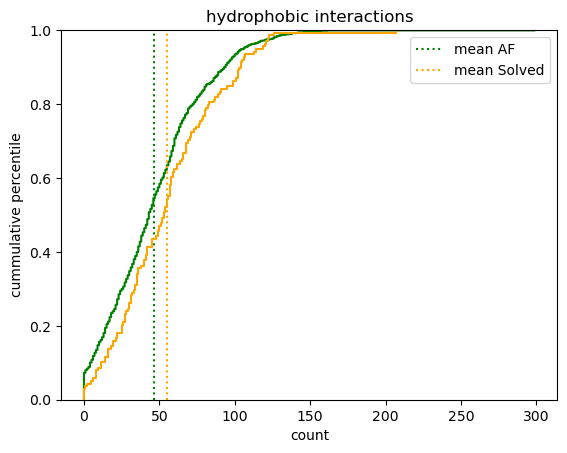

In [36]:
def plotCummulative(column, title, ylabel, xlabel):
    plt.title(title)
    d = dataAF[column]
    plt.ecdf(d, color="green")
    #plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="green", linestyles="dashed")
    plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean AF", colors="green", linestyles="dotted")
    d = dataSolved[column]
    plt.ecdf(d, color="orange")
    #plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="orange", linestyles="dashed")
    plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean Solved", colors="orange", linestyles="dotted")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()
plotCummulative("hbonds", "hydrogen bonds", "cummulative percentile", "count of hydrogen bonds")
plotCummulative("salt_bridges", "salt bridges", "cummulative percentile", "count of hydrogen bonds")
plotCummulative("buried_area", "surface area", "cummulative percentile", "area [Å²]")
plotCummulative("min_distance", "minimum interface distance ", "cummulative percentile", "distance [Å]")
plotCummulative("hydrophobic_interactions", "hydrophobic interactions", "cummulative percentile", "count")

In [18]:
def plotCummulative(column, title, ylabel, xlabel):
    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(13)
    for i, d in enumerate([dataAF[column], dataSolved[column]]):
        ax = axes[i]
        ax.set_title(title)
        ax.ecdf(d)
        ax.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="grey", linestyles="dashed")
        ax.vlines(np.mean(d), ymin=0, ymax=1, label="mean", colors="grey", linestyles="dotted")
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.legend()
    plt.show()

In [ ]:
plotCummulative("hbonds", "hydrogen bonds", "cummulative percentile", "count of hydrogen bonds")

In [ ]:
d = data["hbonds"]
plt.title("hydrogen bonds")
plt.ecdf(d)
plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="grey", linestyles="dashed")
plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean", colors="grey", linestyles="dotted")
plt.ylabel("cummulative percentile")
plt.xlabel("count")
plt.legend()
plt.show()

In [ ]:
d = data["salt_bridges"]
plt.title("salt bridges")
plt.ecdf(d)
plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="grey", linestyles="dashed")
plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean", colors="grey", linestyles="dotted")
plt.ylabel("cummulative percentile")
plt.xlabel("count")
plt.legend()
plt.show()

In [ ]:
d = data["buried_area"]
plt.title("surface area")
plt.ecdf(d)
plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="grey", linestyles="dashed")
plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean", colors="grey", linestyles="dotted")
plt.ylabel("cummulative percentile")
plt.xlabel("area [Å²]")
plt.legend()
plt.show()

In [ ]:
d = data["min_distance"]
plt.title("minimum interface distance")
plt.ecdf(d)
plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="grey", linestyles="dashed")
plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean", colors="grey", linestyles="dotted")
plt.ylabel("cummulative percentile")
plt.xlabel("distance [Å]")
plt.legend()
plt.show()

In [ ]:
d = data["hydrophobic_interactions"]
plt.title("hydrophobic interactions")
plt.ecdf(d)
plt.vlines(np.median(d), ymin=0, ymax=1, label="median", colors="grey", linestyles="dashed")
plt.vlines(np.mean(d), ymin=0, ymax=1, label="mean", colors="grey", linestyles="dotted")
plt.ylabel("cummulative percentile")
plt.xlabel("count")
plt.legend()
plt.show()